# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Read CSV

In [2]:
data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

# Split

In [3]:
# Split features (X) and target variable (y)
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Perform Feature Scaling

In [4]:
# Perform feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=11)

# Build Model

In [5]:
model = Sequential()
model.add(Dense(29, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(11, activation='relu'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                377       
                                                                 
 dense_1 (Dense)             (None, 11)                330       
                                                                 
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 773 (3.02 KB)
Trainable params: 773 (3.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# w1 w2 w3 w4 w5 + b

# Compile

In [8]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# log_dir = "logs/classification_tf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/classification_tf/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model Checkpoint              

In [10]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model/ckpt/{epoch:02d}-{val_loss:.2f}.keras",
    monitor='val_loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)

In [11]:
# tf.keras.callbacks.ModelCheckpoint(
#     filepath,
#     monitor='val_loss',
#     verbose=0,
#     save_best_only=False,
#     save_weights_only=False,
#     mode='auto',
#     save_freq='epoch',
#     initial_value_threshold=None
# )

# Train

In [12]:
history = model.fit(x_train, y_train, epochs=100, batch_size=2, validation_split=0.1,callbacks=[tensorboard_callback])

Epoch 1/100
108/108 [==============================] - 5s 15ms/step - loss: 0.6907 - accuracy: 0.5395 - val_loss: 0.6463 - val_accuracy: 0.7917
Epoch 2/100
108/108 [==============================] - 1s 9ms/step - loss: 0.6555 - accuracy: 0.6512 - val_loss: 0.5937 - val_accuracy: 0.8333
Epoch 3/100
108/108 [==============================] - 1s 10ms/step - loss: 0.6352 - accuracy: 0.6512 - val_loss: 0.5612 - val_accuracy: 0.8333
Epoch 4/100
108/108 [==============================] - 1s 7ms/step - loss: 0.6190 - accuracy: 0.6512 - val_loss: 0.5365 - val_accuracy: 0.8333
Epoch 5/100
108/108 [==============================] - 1s 8ms/step - loss: 0.6023 - accuracy: 0.6512 - val_loss: 0.5138 - val_accuracy: 0.8333
Epoch 6/100
108/108 [==============================] - 2s 19ms/step - loss: 0.5838 - accuracy: 0.6512 - val_loss: 0.5019 - val_accuracy: 0.8333
Epoch 7/100
108/108 [==============================] - 2s 20ms/step - loss: 0.5592 - accuracy: 0.6605 - val_loss: 0.4897 - val_accuracy: 0.

# Evaluate

In [13]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 11ms/step


In [14]:
y_pred = (y_pred > 0.5).astype(int)

# Metrics

In [15]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [16]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.7666666666666667
Recall-Score : 0.56
Precision-Score : 0.8235294117647058
F1-Score : 0.6666666666666666


# Classification Report

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



# Confusion Matrix

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

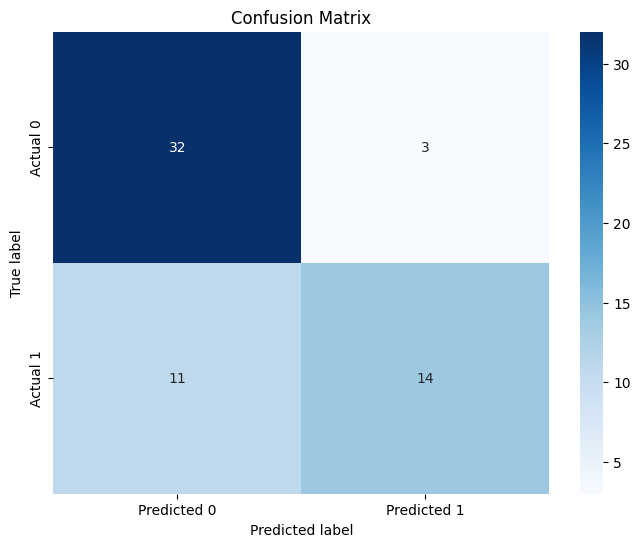

In [19]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Visualize

In [20]:
from tensorflow.keras.models import Model

In [21]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


In [22]:
def plot_activations(layer_name, activations):
    print(f"Layer: {layer_name}")
    print(f"Activation Shape: {activations.shape}")

    if len(activations.shape) == 2:
        # 2D activations (Dense layers)
        plt.figure(figsize=(10, 5))
        plt.bar(range(activations.shape[1]), activations[0], color='skyblue')
        plt.title(f'Activations of {layer_name}')
        plt.xlabel('Neurons')
        plt.ylabel('Activation')
        plt.grid(True)
        plt.show()
    
    elif len(activations.shape) == 3:
        # 3D activations (Convolutional layers)
        num_channels = activations.shape[-1]
        for i in range(num_channels):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, :, :, i], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Channel {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    elif len(activations.shape) == 4:
        # 4D activations (Batches of 3D data, e.g., convolutional layers)
        num_samples = activations.shape[1]
        for i in range(num_samples):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, i, :, :], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Sample {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    else:
        print(f"Activation shape {activations.shape} not supported for visualization")

[[0.22098267 0.         0.         1.1980323  1.4589419  0.23737635
  0.66683626 0.         0.8106653  0.         0.64641315 0.
  0.         0.         0.         0.435186   0.         0.5619975
  0.21990564 0.04691128 0.         0.38092288 0.         0.9786977
  0.96352047 0.3248569  0.         2.0402594  0.        ]]
Layer: dense
Activation Shape: (1, 29)


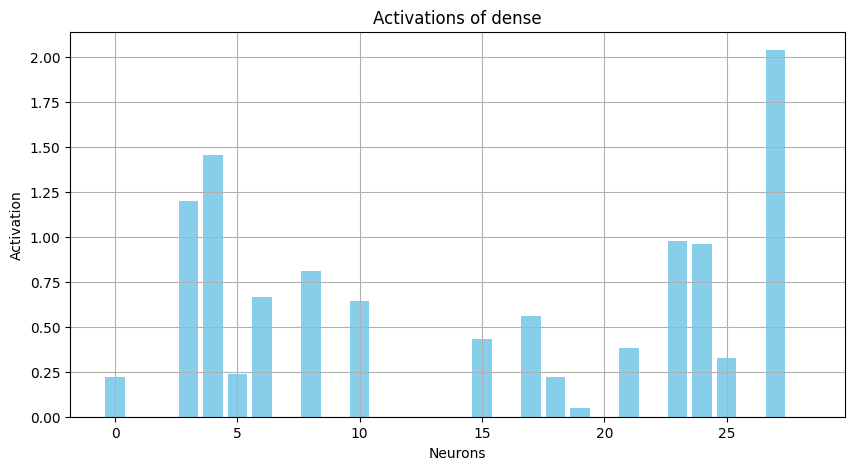

[[0.15287565 0.         0.17310387 0.3280019  0.02775    2.1384523
  0.6536135  0.         2.5499442  1.3692319  0.        ]]
Layer: dense_1
Activation Shape: (1, 11)


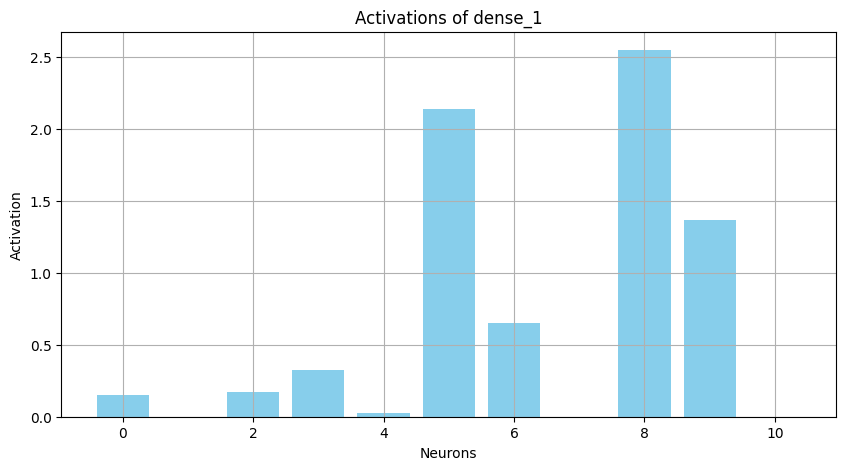

[[ 0.7698922  -0.97993875  0.13628146  0.9658281   0.9706156 ]]
Layer: dense_2
Activation Shape: (1, 5)


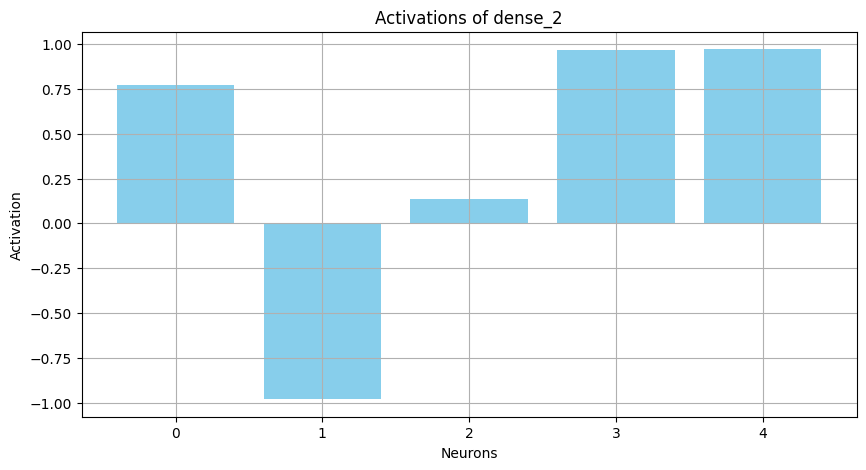

[[0.00277269]]
Layer: dense_3
Activation Shape: (1, 1)


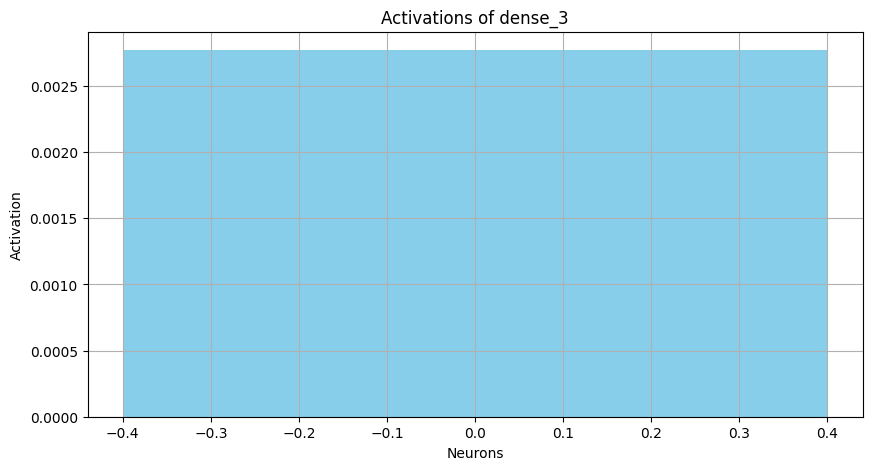

In [23]:
layer_names = [layer.name for layer in model.layers]

X_sample = x_train[11]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)

[[0.22098267 0.         0.         1.1980323  1.4589419  0.23737635
  0.66683626 0.         0.8106653  0.         0.64641315 0.
  0.         0.         0.         0.435186   0.         0.5619975
  0.21990564 0.04691128 0.         0.38092288 0.         0.9786977
  0.96352047 0.3248569  0.         2.0402594  0.        ]]
Layer: dense
Activation Shape: (1, 29)


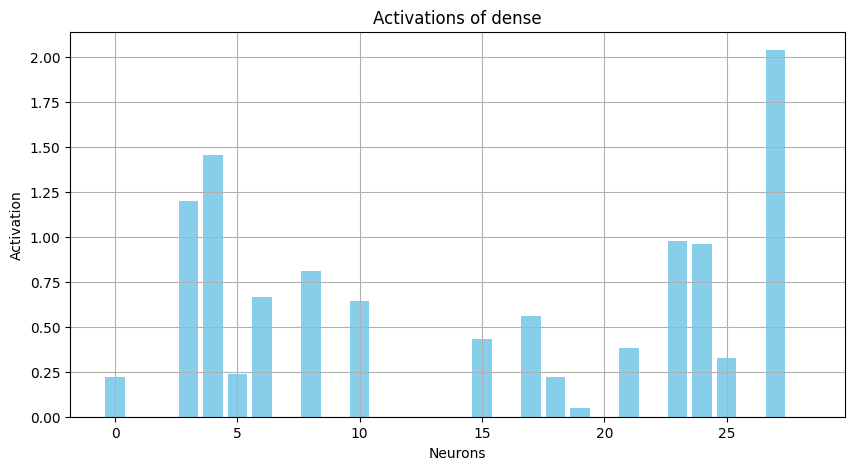

[[0.15287565 0.         0.17310387 0.3280019  0.02775    2.1384523
  0.6536135  0.         2.5499442  1.3692319  0.        ]]
Layer: dense_1
Activation Shape: (1, 11)


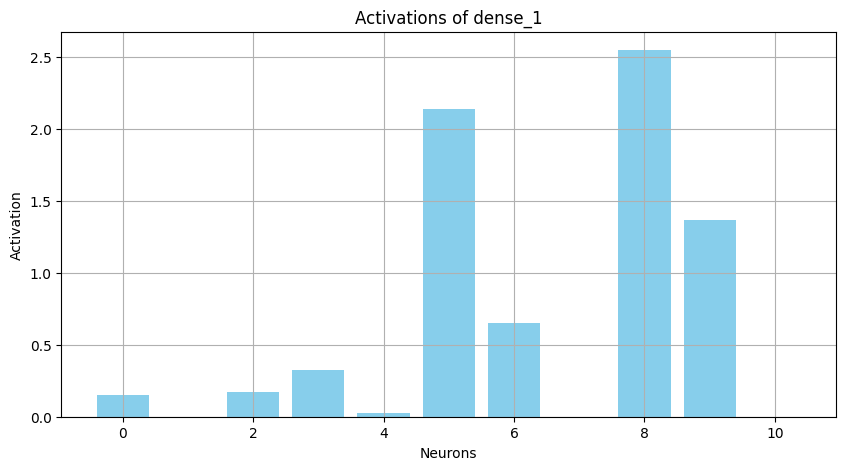

[[ 0.7698922  -0.97993875  0.13628146  0.9658281   0.9706156 ]]
Layer: dense_2
Activation Shape: (1, 5)


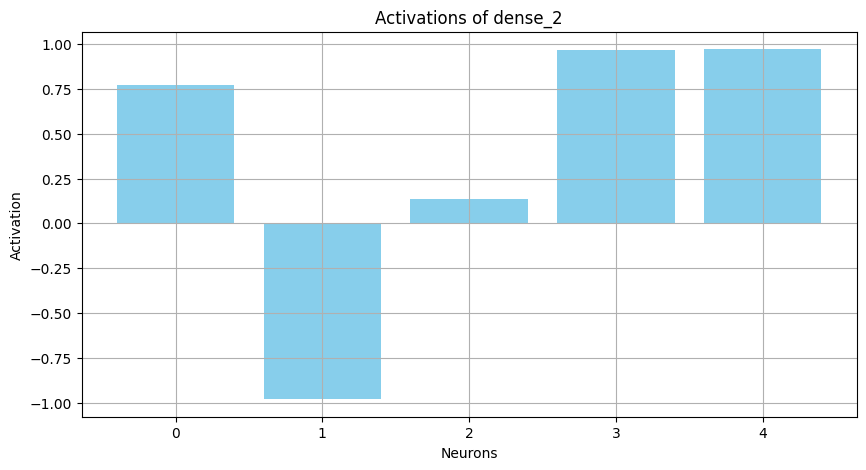

[[0.00277269]]
Layer: dense_3
Activation Shape: (1, 1)


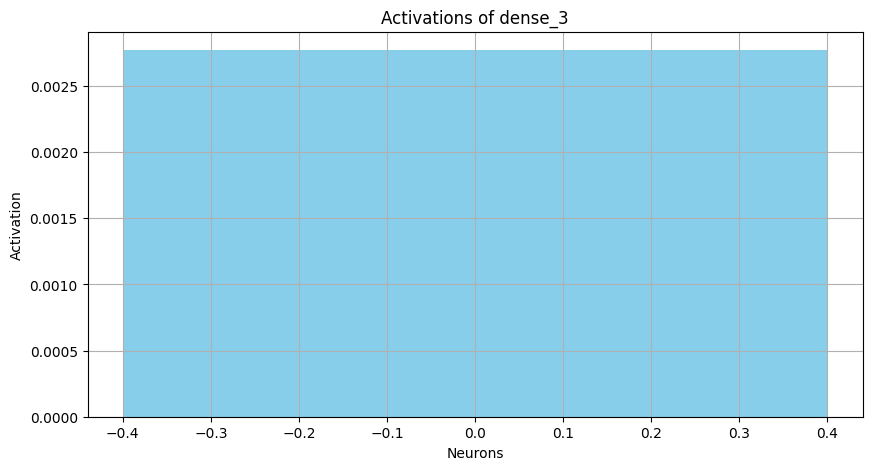

In [24]:
layer_names = [layer.name for layer in model.layers]

X_sample = x_train[11]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)